## 1 Import libraries

In [2]:
from rbm import RBM
from autoencoder_rbm import Autoencoder_RBM
from dbn import DeepBeliefNetwork
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2 MNIST

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

# Download the data in the working directory
mnist = input_data.read_data_sets("../data/mnist/", one_hot=True)

#training_data = {image: mnist.train.images, label: mnist.train.labels}
#validation_data = {image: mnist.validation.images, label: mnist.validation.labels}
#test_data = {image: mnist.test.images, label: mnist.test.labels}
train_dataset = mnist.train.images
train_labels = mnist.train.labels
validation_dataset = mnist.validation.images
validation_labels = mnist.validation.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels
print("The shape of the dataset for training: ", train_dataset.shape, train_labels.shape)
print("The shape of the dataset for validation: ", validation_dataset.shape, validation_labels.shape)
print("The shape of the dataset for test: ", test_dataset.shape, test_labels.shape)

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
The shape of the dataset for training:  (55000, 784) (55000, 10)
The shape of the dataset for validation:  (5000, 784) (5000, 10)
The shape of the dataset for test:  (10000, 784) (10000, 10)


In [20]:
print(np.argmax(train_labels[:21], axis=1))

[7 3 4 6 1 8 1 0 9 8 0 3 1 2 7 0 2 9 6 0 1]


In [15]:
train_set = pd.DataFrame(train_dataset)
labels_tmp = pd.DataFrame(train_labels[:10])
train_set.loc[:10, :10].loc[np.argmax(train_labels[:10],axis=1)==1,:10]

,0,1,2,3,4,5,6,7,8,9,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
train_set_1 = train_set.loc[np.argmax(train_labels, axis=1)==1, :]
train_labels_1 = train_labels[list(train_set_1.index.values)]
print(train_set_1.shape)
print(train_labels_1[:10])
train_set_1.head()

(6179, 784)
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
train_set_7 = train_set.loc[np.argmax(train_labels, axis=1)==7, :]
print(train_set_7.shape)
train_set_7.head()

(5715, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.0 Mix 1 and 7

In [73]:
# Choose 20 images of 7
num_abonormal = 20
batch_images_7 = train_set_7.sample(num_abonormal)
batch_labels_7 = train_labels[list(batch_images_7.index.values)]
print(batch_images_7.shape)
print(batch_labels_7)

(20, 784)
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [74]:
train_set_mix = pd.concat([train_set_1, batch_images_7], ignore_index=True, axis=0)
train_labels_mix = pd.concat([pd.DataFrame(train_labels_1), pd.DataFrame(batch_labels_7)], ignore_index=True, axis=0)

In [75]:
print(batch_images_7.tail())
print(train_set_mix.tail())

       0    1    2    3    4    5    6    7    8    9   ...   774  775  776  \
51233  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
29079  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
21579  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
22379  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
24605  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

       777  778  779  780  781  782  783  
51233  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
29079  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
21579  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
22379  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
24605  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
      0    1    2    3    4    5    6    7    8    9   ...   774  775  776  \
6194  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
6195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
6196  0.0

In [76]:
print(train_labels_mix.tail())

        0    1    2    3    4    5    6    7    8    9
6194  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6195  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6196  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6197  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
6198  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0


In [77]:
# Shuffle train_set_mix and train_labels_mix in the same way
train_set_mix_total = pd.concat([train_set_mix, train_labels_mix], axis=1)
train_set_mix_total = train_set_mix_total.sample(frac=1).reset_index(drop=True)
print(train_set_mix_total.shape)

(6199, 794)


In [78]:
train_set_shuffle = train_set_mix_total.iloc[:, 0:batch_images_7.shape[1]]
train_labels_shuffle = train_set_mix_total.iloc[:, batch_images_7.shape[1]:]
print(train_set_shuffle.shape)
print(train_labels_shuffle.shape)

(6199, 784)
(6199, 10)


In [79]:
train_labels_shuffle[np.argmax(np.array(train_labels_shuffle), axis=1)==7]

,0,1,2,3,4,5,6,7,8,9
186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


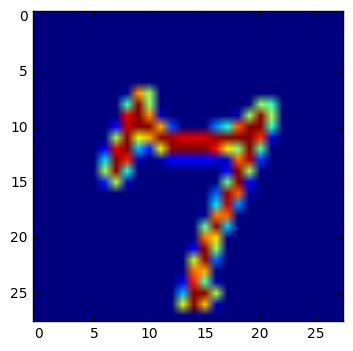

In [82]:
plt.figure()
plt.imshow(train_set_shuffle.iloc[351, :].reshape(28, 28))
plt.show()

In [85]:
# Test for autoencoder
autoencoder = Autoencoder_RBM(
       rbm_layers=[1000, 1000, 1000, 500],
       rbm_gauss_visible=True,
       finetune_num_epochs=150,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression, reconstruction = autoencoder.fit(
    np.array(train_set_shuffle), validation_set=np.array(train_set_shuffle), test_set=np.array(train_set_shuffle))

Iter 1: Training set: current loss 0.168298  ||  Validation set: current loss 0.168303
Validation:  [1864 4375 4473 6082 2274 1016 1231  954 2581 4153 2846 2374 4642 3712 5846
 1886 3726  186 3754    3 1934 5136 3451 5348 3794]
Iter 2: Training set: current loss 0.168386  ||  Validation set: current loss 0.168375
Validation:  [1864 4375 4473 6082 1016 2274 1231 2581  954 4153 2374 2846 3712 3726 4642
  186 3754 5136 5846 1886 4112  131 2775 5348 3794]
Iter 3: Training set: current loss 0.168172  ||  Validation set: current loss 0.168178
Validation:  [1864 4375 4473 6082 1016 2274 1231 2581  954 4153 2846 2374 3712 4642 5846
 3726  186 1886 3754 5136    3 4112 1934 5348 3794]
Iter 4: Training set: current loss 0.168227  ||  Validation set: current loss 0.168220
Validation:  [1864 4375 4473 6082 1016 2274 1231  954 2581 4153 2846 2374 4642 3712 5846
 1886 3726  186 3754 5136    3 1934 5348 4112 3451]
Iter 5: Training set: current loss 0.168126  ||  Validation set: current loss 0.168128
V

In [86]:
final_25 = [6082, 1864, 4473, 4375, 1231, 1016, 2274,  954, 2374, 3712, 4153, 4642, 5348, 3794, 5281,
            2846, 3451, 2168, 1934,  244, 2452, 3195,  351,  186,  348]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


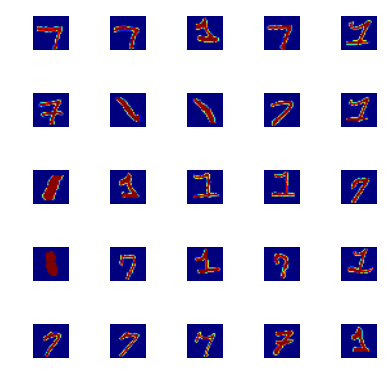

In [91]:
plt.figure(figsize=(4, 4))
n_rows = 5
n_cols = 5

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    #plt.imshow(train_set_shuffle.loc[final_25[i]].reshape(28, 28),
     #          interpolation="none", cmap="gray_r")
    plt.imshow(train_set_shuffle.loc[final_25[i]].reshape(28, 28))
    plt.axis("off")
plt.tight_layout()
plt.savefig('top_25.png')
plt.show()

In [69]:
number = 2
train_set_shuffle.to_csv(('experiments/train_set_shuffle_'+str(number)+'.csv'))
train_labels_shuffle.to_csv(('/experiments/train_labels_shuffle_1'+str(number)+'.csv'))
pd.DataFrame(reconstruction).to_csv('/experiments/reconstruction_1'+str(number)+'.csv'))
pd.DataFrame(compression).to_csv('/experiments/compression_1'+str(number)+'.csv'))

### 2.1 RBM

In [ ]:
# Test for RBM
rbm_model = RBM(visible_unit_type='gauss', batch_size=100, n_epochs=3, learning_rate=0.01)
rbm_model.fit(train_dataset, validation_set = validation_dataset)
rbm_model.get_parameters(tf.Graph())
print(rbm_model.trained_params)

### 2.2 DBN

##### 2.1 DBN without pretrain

In [59]:
dbn_model = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[20, 20],
        rbm_gauss_visible=True,
        finetune_num_epochs=30,
        do_pretrain=False)
dbn_model.fit(train_dataset, train_labels, validation_dataset, validation_labels)

Iter 1:    Training: current loss 2.302641 | current accuracy 0.112345    ||    Validation: current loss 2.301809 | current accuracy 0.112600
Iter 2:    Training: current loss 2.302948 | current accuracy 0.112345    ||    Validation: current loss 2.302728 | current accuracy 0.112600
Iter 3:    Training: current loss 2.302518 | current accuracy 0.112345    ||    Validation: current loss 2.301333 | current accuracy 0.112600
Iter 4:    Training: current loss 2.302155 | current accuracy 0.112345    ||    Validation: current loss 2.301389 | current accuracy 0.112600
Iter 5:    Training: current loss 2.302402 | current accuracy 0.112345    ||    Validation: current loss 2.301998 | current accuracy 0.112600
Iter 6:    Training: current loss 2.302248 | current accuracy 0.099455    ||    Validation: current loss 2.302324 | current accuracy 0.097600
Iter 7:    Training: current loss 2.301985 | current accuracy 0.099455    ||    Validation: current loss 2.302417 | current accuracy 0.097600
Iter 8

KeyboardInterrupt: 

##### 2.2 DBN with pretrain

In [60]:
dbn_model = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[10, 10],
        rbm_gauss_visible=True,
        finetune_num_epochs=50,
        do_pretrain=True)
dbn_model.fit(train_dataset, train_labels, validation_dataset, validation_labels)

hidden layer 1 has been pretrained
hidden layer 2 has been pretrained
Iter 1:    Training: current loss 2.301447 | current accuracy 0.108400    ||    Validation: current loss 2.307787 | current accuracy 0.094800
Iter 2:    Training: current loss 2.301331 | current accuracy 0.112345    ||    Validation: current loss 2.305127 | current accuracy 0.112600
Iter 3:    Training: current loss 2.301613 | current accuracy 0.111764    ||    Validation: current loss 2.301874 | current accuracy 0.115600
Iter 4:    Training: current loss 2.301250 | current accuracy 0.112400    ||    Validation: current loss 2.302213 | current accuracy 0.112800
Iter 5:    Training: current loss 2.301138 | current accuracy 0.112491    ||    Validation: current loss 2.300546 | current accuracy 0.113400
Iter 6:    Training: current loss 2.300986 | current accuracy 0.109509    ||    Validation: current loss 2.305463 | current accuracy 0.117400
Iter 7:    Training: current loss 2.301050 | current accuracy 0.112436    ||  

KeyboardInterrupt: 

### 2.3 Autoencoder

##### 2.3.1 Without pretrain

In [6]:
# Test for autoencoder
autoencoder = Autoencoder_RBM(
       rbm_layers=[500, 5],
       rbm_gauss_visible=True,
       finetune_num_epochs=300,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression, reconstruction, loss_summary = autoencoder.fit(train_dataset, validation_set=validation_dataset, test_set=test_dataset)

Iter 1: Training set: current loss 0.257821  ||  Validation set: current loss 0.258842
Validation:  [3106 1466 1367 1999 3607 2009 1448 3370 4270 1963  121 2019 3776 3698 1995
 2257 4653  464 3376  872 4462 4245 4863 1420 4203]
Iter 2: Training set: current loss 0.257738  ||  Validation set: current loss 0.258714
Validation:  [3106 1466 1367 1999 3607 2009 1448 3370 4270  121 3776 1963 2019 3698 2257
  464 3376 4653 1995 4462 1420  872 4245 4863 4203]
Iter 3: Training set: current loss 0.257711  ||  Validation set: current loss 0.258640
Validation:  [3106 1367 1999 1466 3607 2009 1448 3370 4270  121 1963 2019 3776 3698 2257
 4653 1995  464 3376 4462 4245  872 1420 4203 4863]
Iter 4: Training set: current loss 0.257644  ||  Validation set: current loss 0.258589
Validation:  [3106 1466 1367 3607 1999 2009 1448 3370  121 4270 1963 2019 3776 3698 2257
  464 3376 4653 1995  872 4245 4462 1420 4863 4114]
Iter 5: Training set: current loss 0.257622  ||  Validation set: current loss 0.258509
V

KeyboardInterrupt: 

##### 2.3.2 With pretrain phase

In [8]:
# Test for autoencoder
autoencoder = Autoencoder_RBM(
       rbm_layers=[50, 10],
       rbm_gauss_visible=True,
       finetune_num_epochs=30,
       finetune_loss_func='mse',
       do_pretrain=True,
       tied_weights=False)
compression, reconstruction = autoencoder.fit(train_dataset, validation_set=validation_dataset, test_set=test_dataset)

hidden layer 1 has been pretrained
hidden layer 2 has been pretrained
Iter 1: Training set: current loss 0.200339  ||  Validation set: current loss 0.200524
Iter 2: Training set: current loss 0.199371  ||  Validation set: current loss 0.199497
Iter 3: Training set: current loss 0.198589  ||  Validation set: current loss 0.198697
Iter 4: Training set: current loss 0.197930  ||  Validation set: current loss 0.198030
Iter 5: Training set: current loss 0.197354  ||  Validation set: current loss 0.197447
Iter 6: Training set: current loss 0.196848  ||  Validation set: current loss 0.196936
Iter 7: Training set: current loss 0.196397  ||  Validation set: current loss 0.196489
Iter 8: Training set: current loss 0.195977  ||  Validation set: current loss 0.196063
Iter 9: Training set: current loss 0.195581  ||  Validation set: current loss 0.195680
Iter 10: Training set: current loss 0.195218  ||  Validation set: current loss 0.195325
Iter 11: Training set: current loss 0.194868  ||  Validatio

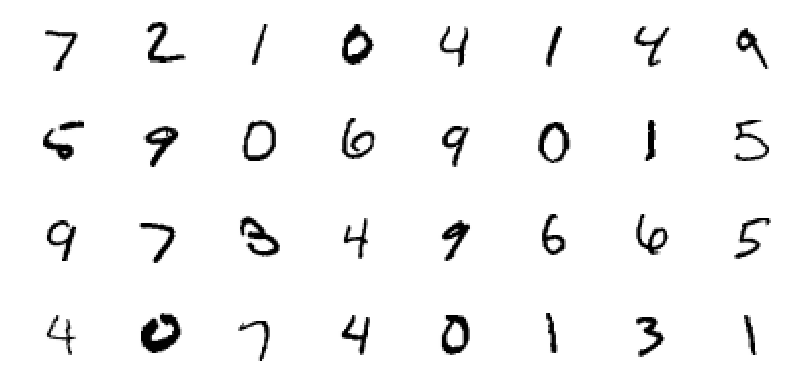

In [13]:
plt.figure(figsize=(8, 4))
n_rows = 4
n_cols = 8

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(test_dataset[i].reshape(28, 28),
               interpolation="none", cmap="gray_r")
    plt.axis("off")
plt.tight_layout()
plt.show()

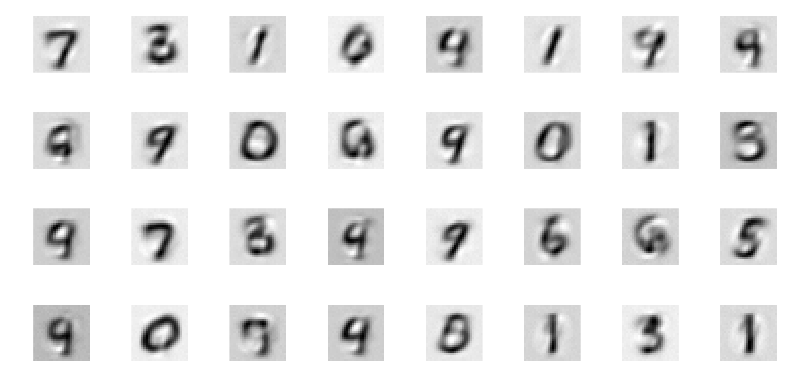

In [12]:
plt.figure(figsize=(8, 4))
n_rows = 4
n_cols = 8

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(reconstruction[i].reshape(28, 28),
               interpolation="none", cmap="gray_r")
    plt.axis("off")
#plt.title('Reconstruction images')
plt.tight_layout()
plt.show()

## 3 Hadoop dataset

##### 3.1 Read dataset

In [14]:
df = pd.read_csv('../data/tobeone.csv')
df.head()

,timestamp,balance.999,balance-numeric.999,balance-standarddeviation.999,boottime_event.0,boottime_event.8,boottime_event.5,boottime_event.2,boottime_event.9,boottime_event.6,...,swap_total_event.8,swap_total_event.5,swap_total_event.2,swap_total_event.9,swap_total_event.6,swap_total_event.7,swap_total_event.1,swap_total_event.28,swap_total_event.4,swap_total_event.3
0,1427515215000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0
1,1427515230000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0
2,1427515245000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0
3,1427515260000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0
4,1427515275000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0


##### 3.2 Handle with timestamp and missing values

In [15]:
df.set_index("timestamp", drop=True, inplace=True)
df.dropna(inplace=True)
df.head()

,balance.999,balance-numeric.999,balance-standarddeviation.999,boottime_event.0,boottime_event.8,boottime_event.5,boottime_event.2,boottime_event.9,boottime_event.6,boottime_event.7,...,swap_total_event.8,swap_total_event.5,swap_total_event.2,swap_total_event.9,swap_total_event.6,swap_total_event.7,swap_total_event.1,swap_total_event.28,swap_total_event.4,swap_total_event.3
timestamp,,,,,,,,,,,,,,,,,,,,,
1427515215000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0
1427515230000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0
1427515245000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0
1427515260000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0
1427515275000,1,0,0,1.412758e+09,1.412758e+09,1.412758e+09,1.404439e+09,1.412758e+09,1.412758e+09,1.412758e+09,...,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0,1023992.0


##### 3.3 Normalize features

In [32]:
n = df.shape[1]
df_normal = pd.DataFrame([])

for i in range(n):
    df_temp = df.iloc[:,i]
    max_value = df_temp.max()
    min_value = df_temp.min()
    if(max_value != min_value):
        df_temp = df_temp.apply(lambda x: (x - min_value) / (max_value - min_value))
        df_normal = pd.concat([df_normal,df_temp], axis=1)
    else:
        print(i, end='||')
print()
df_normal.head()

3||4||5||6||7||8||9||10||12||13||36||37||38||39||40||41||42||43||44||45||46||58||59||60||61||62||63||64||65||66||67||68||69||70||71||72||73||74||75||76||77||78||79||80||81||82||83||84||85||86||87||88||89||90||135||136||137||138||139||140||141||142||143||144||145||201||202||203||204||205||206||207||208||209||210||211||212||213||214||215||216||217||218||219||220||221||222||289||290||291||292||293||294||295||296||297||298||299||


,balance.999,balance-numeric.999,balance-standarddeviation.999,boottime_event.28,bytes_in_event.0,bytes_in_event.8,bytes_in_event.5,bytes_in_event.2,bytes_in_event.9,bytes_in_event.6,...,swap_free_event.8,swap_free_event.5,swap_free_event.2,swap_free_event.9,swap_free_event.6,swap_free_event.7,swap_free_event.1,swap_free_event.28,swap_free_event.4,swap_free_event.3
timestamp,,,,,,,,,,,,,,,,,,,,,
1427515215000,1.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.914737,0.862405,0.894213,0.924754,0.899543,0.952195,0.932105,0.988968,0.928268,0.907992
1427515230000,1.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.914737,0.862405,0.894213,0.924754,0.899543,0.952195,0.932105,0.988968,0.928268,0.907992
1427515245000,1.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.914737,0.862405,0.894213,0.924754,0.899543,0.952195,0.932105,0.988968,0.928268,0.907992
1427515260000,1.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.914737,0.862405,0.894213,0.924754,0.899543,0.952195,0.932105,0.988968,0.928268,0.907992
1427515275000,1.0,0.0,0.0,0.0,0.000002,0.000002,0.000002,0.000002,0.000002,0.000003,...,0.914737,0.862405,0.894213,0.924754,0.899543,0.952195,0.932105,0.988968,0.928268,0.907992


##### 3.3 Autoencoding

In [33]:
train_hd = np.array(df_normal)
train_hd[:5]

array([[ 1.        ,  0.        ,  0.        , ...,  0.98896806,
         0.92826815,  0.90799248],
       [ 1.        ,  0.        ,  0.        , ...,  0.98896806,
         0.92826815,  0.90799248],
       [ 1.        ,  0.        ,  0.        , ...,  0.98896806,
         0.92826815,  0.90799248],
       [ 1.        ,  0.        ,  0.        , ...,  0.98896806,
         0.92826815,  0.90799248],
       [ 1.        ,  0.        ,  0.        , ...,  0.98896806,
         0.92826815,  0.90799248]])

##### 3.3.1 Without pretrain

In [38]:
# Test for autoencoder
autoencoder = Autoencoder_RBM(
       rbm_layers=[100, 20],
       rbm_gauss_visible=True,
       finetune_num_epochs=30,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)
compression_hd_no_pretrain, reconstruction_hd_no_pretrain = autoencoder.fit(train_hd, test_set=train_hd)

Iter 1: Training set: current loss 0.162466
Iter 2: Training set: current loss 0.162749
Iter 3: Training set: current loss 0.162379
Iter 4: Training set: current loss 0.162641
Iter 5: Training set: current loss 0.162366
Iter 6: Training set: current loss 0.162412
Iter 7: Training set: current loss 0.162262
Iter 8: Training set: current loss 0.162028
Iter 9: Training set: current loss 0.162010
Iter 10: Training set: current loss 0.161833
Iter 11: Training set: current loss 0.161781
Iter 12: Training set: current loss 0.161435
Iter 13: Training set: current loss 0.160737
Iter 14: Training set: current loss 0.160147
Iter 15: Training set: current loss 0.158631
Iter 16: Training set: current loss 0.156632
Iter 17: Training set: current loss 0.152857
Iter 18: Training set: current loss 0.146896
Iter 19: Training set: current loss 0.139810
Iter 20: Training set: current loss 0.134884
Iter 21: Training set: current loss 0.132901
Iter 22: Training set: current loss 0.132031
Iter 23: Training s

In [39]:
# Test for autoencoder
autoencoder = Autoencoder_RBM(
       rbm_layers=[100, 20],
       rbm_gauss_visible=True,
       finetune_num_epochs=30,
       finetune_loss_func='mse',
       do_pretrain=True,
       tied_weights=False)
compression_hd, reconstruction_hd = autoencoder.fit(train_hd, test_set=train_hd)

hidden layer 1 has been pretrained
hidden layer 2 has been pretrained
Iter 1: Training set: current loss 0.068562
Iter 2: Training set: current loss 0.065330
Iter 3: Training set: current loss 0.063341
Iter 4: Training set: current loss 0.061996
Iter 5: Training set: current loss 0.060931
Iter 6: Training set: current loss 0.060135
Iter 7: Training set: current loss 0.059433
Iter 8: Training set: current loss 0.058685
Iter 9: Training set: current loss 0.058060
Iter 10: Training set: current loss 0.057659
Iter 11: Training set: current loss 0.057235
Iter 12: Training set: current loss 0.056772
Iter 13: Training set: current loss 0.056498
Iter 14: Training set: current loss 0.056196
Iter 15: Training set: current loss 0.055846
Iter 16: Training set: current loss 0.055635
Iter 17: Training set: current loss 0.055144
Iter 18: Training set: current loss 0.054976
Iter 19: Training set: current loss 0.054793
Iter 20: Training set: current loss 0.054477
Iter 21: Training set: current loss 0.0

In [45]:
dif = train_hd - reconstruction_hd
dif = np.multiply(dif, dif)
dif = np.sum(dif, axis=1) / dif.shape[1]

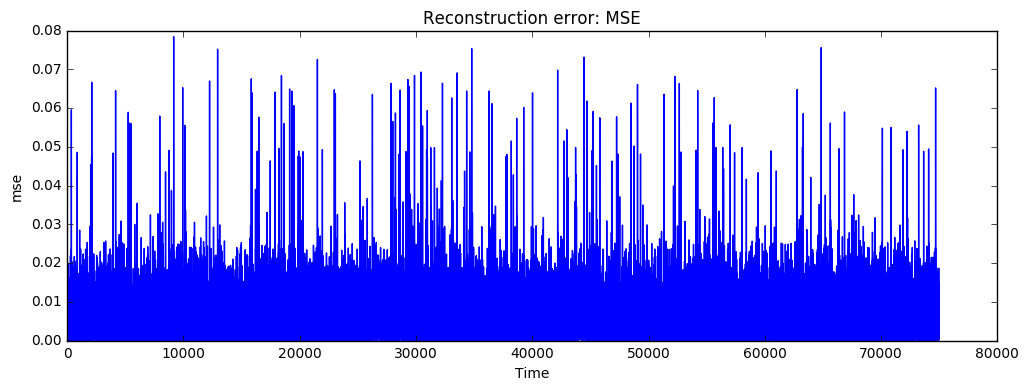

In [48]:
plt.figure(figsize=(12, 4))
plt.plot(dif)
plt.title('Reconstruction error: MSE')
plt.xlabel('Time')
plt.ylabel('mse')
plt.show()